In [27]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from tqdm import tqdm
import missingno

In [8]:
# geolocator = Nominatim(user_agent="Rukshar_Poland_Locator")

# location = geolocator.reverse( "52.509669, 13.376294")  #(location.latitude, location.longitude)

# print(location.address)
# print()
# print((location.latitude, location.longitude))
# print()
# print(location.raw)
# print()
# print(location.raw.keys())
# print()
# print(location.raw['address'])

In [32]:
geolocator = Nominatim(user_agent="Rukshar_Poland_Locator")
# Read from Dataframe
df = pd.read_csv('stations.csv')

lats=df['LAT'].to_list()
lons=df['LON'].to_list()
# Creating a zip with latitudes and longitudes
coords=list(zip(lats,lons))

full_address=[]
for i in tqdm(range(len(coords))):
    try: #to handle any undesirable exceptions and erros
        location = geolocator.reverse(coords[i])
        #print(location.raw['address'])
        loc = []
        powiat = np.NaN
        voivod = np.NaN
        try: #handle cases if powiat is absent
            powiat = location.raw['address']['county']
        except:
            powiat = np.NaN
        
        try: #handle cases if voivod is absent
            voivod = location.raw['address']['state']
        except:
            voivod = np.NaN
        loc = [
            powiat, voivod
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
        #break
    except:
        loc = [
            np.NaN, np.NaN
            ] # county/powiat, state/voivod, 
        full_address.append(loc)
    
address=pd.DataFrame(data=full_address, columns=[  'county','state', ])



100%|██████████| 134/134 [01:09<00:00,  1.91it/s]


In [33]:
final_df = pd.concat([df, address], axis=1) #concat with the original stations data 
final_df.head()

,Unnamed: 0,STAID,STANAME,CN,LAT,LON,HGHT,county,state
0,0,24860,PSZCZYNA,PL,50.000000,18.916667,261,powiat pszczyński,województwo śląskie
1,1,24876,JABLONKA,PL,49.466667,19.700000,671,powiat nowotarski,województwo małopolskie
2,2,24880,GUBALOWKA,PL,49.300000,19.933333,856,powiat tatrzański,województwo małopolskie
3,3,24881,WITOW,PL,49.333333,19.833333,844,powiat tatrzański,województwo małopolskie
4,4,24885,LAZY,PL,49.966667,20.500000,251,powiat bocheński,województwo małopolskie


In [34]:
final_df.shape

(134, 9)

In [35]:
final_df.to_csv('stations_with_powiat_voivod.csv', index= False)

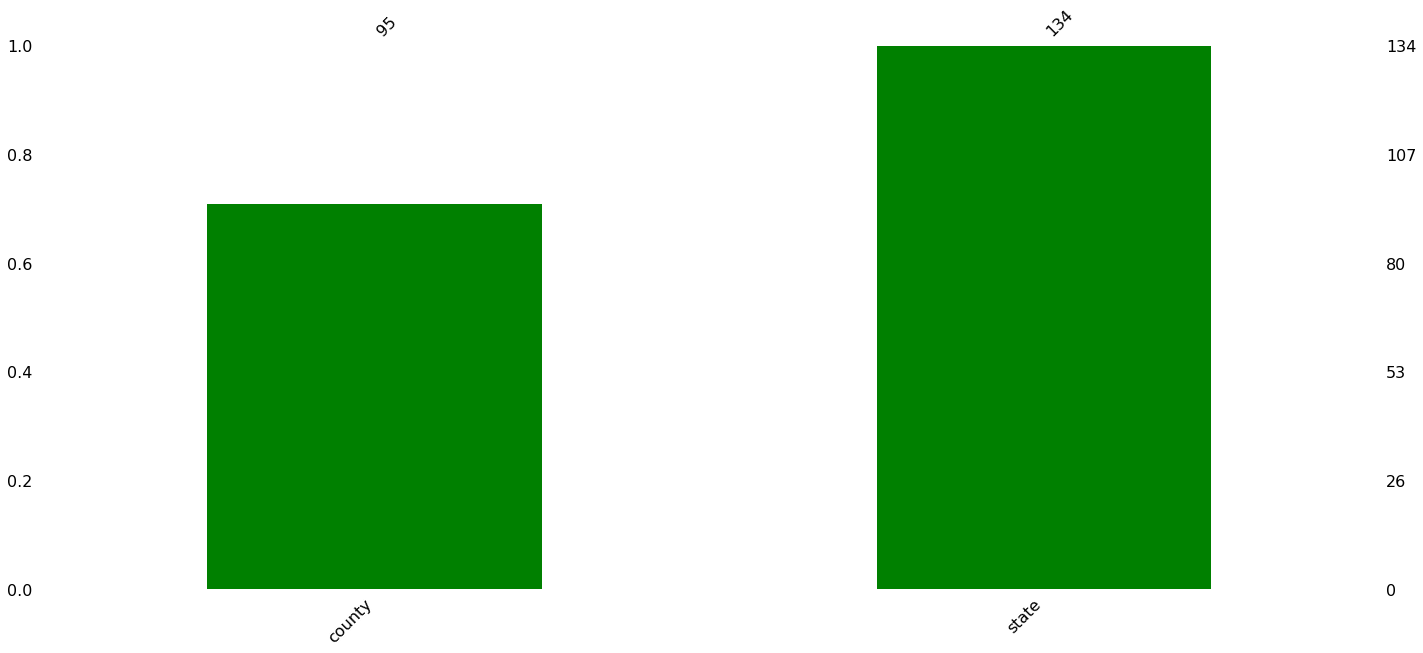

In [31]:
missingno.bar(address, color='g') #check for missing values and produce bar chart counting available data